In [2]:
import os
import glob
from pathlib import Path
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import requests
from bs4 import BeautifulSoup as bs
import json

import re
from tqdm import tqdm

C:\Users\speci\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## 감정태그 확인

In [7]:
인기테마 = ['기분전환', '감성', '힐링', '드라이브', '사랑', '추억', '이별', '여행', '여름', '휴식',
        '운동', '비오는날', '분위기', '위로', '트렌디', '공부', '몽환', 'ASMR', '카페', '클럽', '매장', 
        '노래방', '버스', '라운지', '한강', '집', '지하철'
       ]

In [8]:
인기장르 = ['발라드', '힙합', '인디', '댄스', '뉴에이지', '알앤비', '재즈', '클래식', '록', 
        '팝', 'OST', 'EDM', 'CCM', 'JPOP', '트로트', '월드뮤직', '블루스', '컨트리']

In [9]:
인기태그 = ['환상', '느긋한', '페스티벌', '여름밤', '싱잉랩', '생각', '흐림', '잔잔한', '설렘']

In [10]:
#major sentiment : happy, angry, peaceful, sad
감정태그1 = ['행복한', '화나는', '슬픈', '평온한']

In [11]:
#Excited, happy, contented, calm, fatigue, depressed, sad, disgusted, angry, nervous, fear, surprised
감정태그2 = ['설레는', '행복한', '만족하는', '침착한', '피로한', '우울한', '슬픈', '역겨운', '화난', '불안한', '두려운', '놀란']

In [12]:
total_tag_list = 인기장르 + 인기태그 + 감정태그1 + 감정태그2

In [13]:
print(total_tag_list)

['발라드', '힙합', '인디', '댄스', '뉴에이지', '알앤비', '재즈', '클래식', '록', '팝', 'OST', 'EDM', 'CCM', 'JPOP', '트로트', '월드뮤직', '블루스', '컨트리', '환상', '느긋한', '페스티벌', '여름밤', '싱잉랩', '생각', '흐림', '잔잔한', '설렘', '행복한', '화나는', '슬픈', '평온한', '설레는', '행복한', '만족하는', '침착한', '피로한', '우울한', '슬픈', '역겨운', '화난', '불안한', '두려운', '놀란']


In [14]:
pd.read_csv('data/tags(43).csv')

,keyword,playlist_numbers,related_tags_numbers,related_tags
0,발라드,14214,30,감성
1,발라드,14214,30,잔잔한
2,발라드,14214,30,이별
3,발라드,14214,30,사랑
4,발라드,14214,30,기분전환
...,...,...,...,...
1028,슬픈,4461,30,힐링
1029,슬픈,4461,30,헤어짐
1030,슬픈,4461,30,팝송
1031,슬픈,4461,30,이별노래


## 플레이리스트 태그 라벨링

In [4]:
all_playlist_df = pd.read_csv('data/playlist(325).csv')

In [5]:
all_playlist_df

,plylstSeq,title,tag
0,506358530,작업하기 좋은 핫플 카페에서 들었던 음악 TOP 100,감성
1,511214436,"비 내리는 여름날, 잔잔한 Lo-fi 감성",감성
2,506225967,"전주부터 설렘 가득, 귓가에 계속 맴도는 드라마 OST 모음",감성
3,488734201,비오는 날 듣고 싶은 노래 // 비와 어울리는 감성 Mood,감성
4,464652255,평생 나만 알고 싶은 P̤̮O̤̮P̤̮ ①,감성
...,...,...,...
533039,485798583,잠못드는 밤 비 오는소리 들리네요,우울할때
533040,505412671,우울할 때 들으면 기부니가 좋아지는 노래들,우울할때
533041,418474262,토닥토닥 위로가 필요할 때,우울할때
533042,510612265,생각이 많은 날 듣는 해외 팝/RnB,우울할때


In [49]:
all_playlist_tag_df = all_playlist_df.groupby(['plylstSeq']).agg({"tag" : lambda x : '//'.join(x)})

In [77]:
all_playlist_tag_df.reset_index(drop=False, inplace=True)

In [91]:
all_playlist_tag_df = all_playlist_tag_df.rename(columns={'plylstSeq':'plylstseq'})

In [92]:
all_playlist_tag_df

,plylstseq,tag
0,100000009,팝//Pop
1,100000031,힙합//랩//HipHop
2,100000052,발라드
3,100000087,발라드
4,100000091,발라드
...,...,...
148120,513152995,케이팝//아이돌//kpop//하이틴
148121,513153308,걸그룹
148122,513154151,댄스//알앤비//케이팝//최신가요//오늘신곡모음//RnB//kpop
148123,513154895,매장음악//봄//설렘//커피


In [103]:
all_playlist_tag_df['plylstseq'] = all_playlist_tag_df['plylstseq'].astype('str')

In [104]:
all_playlist_tag_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148125 entries, 0 to 148124
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   plylstseq  148125 non-null  object
 1   tag        148125 non-null  object
dtypes: object(2)
memory usage: 2.3+ MB


In [105]:
all_playlist_tag_df.to_parquet(f'data/playlist_tags.parquet.gzip', compression = 'gzip', index=False)

## 수집한 곡에 플레이리스트&태그 라벨링

In [94]:
playlist_songs_all_df = pd.DataFrame()
for i in range(10):
    if(i == 0):
        playlist_songs_all_df = pd.read_parquet(f'data/playlist_songs/playlist_songs({i}).parquet.gzip')
    else:
        playlist_songs_all_df = pd.concat([playlist_songs_all_df, pd.read_parquet(f'data/playlist_songs/playlist_songs({i}).parquet.gzip')])

In [95]:
playlist_songs_all_df

,song_code,song_name,singer_code,singer_name,plylstseq
0,34301580,don't miss me,2886494,Claire Rosinkranz,506358530
1,34034636,Waves,2631823,Fiji Blue,506358530
2,33502105,Every Second,2899158,Mina Okabe,506358530
3,32887963,WHO IS EMILY?,2191881,Chloe Lilac,506358530
4,33782327,strawberry cheesecake,2881662,Dempsey Hope,506358530
...,...,...,...,...,...
366998,32225444,터널,968261,김세정,503141048
366999,8233373,Bye bye my blue,698776,백예린 (Yerin Baek),503141048
367000,4073182,비온다,184910,선우정아,503141048
367001,4264640,삐뚤어졌어,184910,선우정아,503141048


In [97]:
playlist_songs_all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4448320 entries, 0 to 367002
Data columns (total 5 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   song_code    object
 1   song_name    object
 2   singer_code  object
 3   singer_name  object
 4   plylstseq    int64 
dtypes: int64(1), object(4)
memory usage: 203.6+ MB


In [106]:
playlist_songs_all_df['plylstseq'] = playlist_songs_all_df['plylstseq'].astype('str')

In [107]:
playlist_songs_all_df

,song_code,song_name,singer_code,singer_name,plylstseq
0,34301580,don't miss me,2886494,Claire Rosinkranz,506358530
1,34034636,Waves,2631823,Fiji Blue,506358530
2,33502105,Every Second,2899158,Mina Okabe,506358530
3,32887963,WHO IS EMILY?,2191881,Chloe Lilac,506358530
4,33782327,strawberry cheesecake,2881662,Dempsey Hope,506358530
...,...,...,...,...,...
366998,32225444,터널,968261,김세정,503141048
366999,8233373,Bye bye my blue,698776,백예린 (Yerin Baek),503141048
367000,4073182,비온다,184910,선우정아,503141048
367001,4264640,삐뚤어졌어,184910,선우정아,503141048


In [108]:
playlist_songs_all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4448320 entries, 0 to 367002
Data columns (total 5 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   song_code    object
 1   song_name    object
 2   singer_code  object
 3   singer_name  object
 4   plylstseq    object
dtypes: object(5)
memory usage: 203.6+ MB


In [111]:
playlist_songs_tag_df = pd.merge(playlist_songs_all_df, all_playlist_tag_df, how='left', on='plylstseq')

In [112]:
playlist_songs_tag_df

,song_code,song_name,singer_code,singer_name,plylstseq,tag
0,34301580,don't miss me,2886494,Claire Rosinkranz,506358530,감성//기분전환//카페//팝//Pop//공부//팝송//커피//매장//까페
1,34034636,Waves,2631823,Fiji Blue,506358530,감성//기분전환//카페//팝//Pop//공부//팝송//커피//매장//까페
2,33502105,Every Second,2899158,Mina Okabe,506358530,감성//기분전환//카페//팝//Pop//공부//팝송//커피//매장//까페
3,32887963,WHO IS EMILY?,2191881,Chloe Lilac,506358530,감성//기분전환//카페//팝//Pop//공부//팝송//커피//매장//까페
4,33782327,strawberry cheesecake,2881662,Dempsey Hope,506358530,감성//기분전환//카페//팝//Pop//공부//팝송//커피//매장//까페
...,...,...,...,...,...,...
4448315,32225444,터널,968261,김세정,503141048,우울할때
4448316,8233373,Bye bye my blue,698776,백예린 (Yerin Baek),503141048,우울할때
4448317,4073182,비온다,184910,선우정아,503141048,우울할때
4448318,4264640,삐뚤어졌어,184910,선우정아,503141048,우울할때


In [113]:
playlist_songs_tag_df = playlist_songs_tag_df.groupby('song_code').agg({"plylstseq" : lambda x : '//'.join(x),
                                                                       "tag" : lambda x : '//'.join(x)
                                                                       })

In [114]:
playlist_songs_tag_df

,plylstseq,tag
song_code,,
100003756,474294256,라틴//Latin
100007566,479229340,매장음악//분위기//연주곡//재즈//Jazz
1000077,425760922,클래식//classic//바이올린
1000093,442131721,클래식//classic
1000098,442131721,클래식//classic
...,...,...
999832,101584353//420222466,클래식//classic//클래식//classic
999855,421551239,힐링//자장가//편안한//클래식//태교//classic//편안함
999945,101597672//101635572,클래식//classic//클래식//classic


In [118]:
playlist_songs_tag_df.reset_index(drop=False, inplace=True)

In [119]:
playlist_songs_tag_df

,song_code,plylstseq,tag
0,100003756,474294256,라틴//Latin
1,100007566,479229340,매장음악//분위기//연주곡//재즈//Jazz
2,1000077,425760922,클래식//classic//바이올린
3,1000093,442131721,클래식//classic
4,1000098,442131721,클래식//classic
...,...,...,...
619463,999832,101584353//420222466,클래식//classic//클래식//classic
619464,999855,421551239,힐링//자장가//편안한//클래식//태교//classic//편안함
619465,999945,101597672//101635572,클래식//classic//클래식//classic
619466,999972,100146146,락//Rock//록


In [120]:
playlist_songs_tag_df.to_parquet(f'data/playlist_song_tags.parquet.gzip', compression = 'gzip', index=False)

## 수집한곡 전처리

In [68]:
path = r'./data/songs_info'  # use your path
all_files = glob.glob(path + '/*/*.tsv')

songs_list = []
for filename in all_files:
    df = pd.read_csv(filename, sep="\t")
    songs_list.append(df)

songs = pd.concat(songs_list, axis=0, ignore_index=True)

print(songs.shape)
display(songs)

(619468, 8)


,song_code,song_title,artist,album_cover,album_title,public_date,genre,lyrics
0,30413695,별 헤는 밤,홍서영,https://cdnimg.melon.co.kr/cm/album/images/100...,그녀는 거짓말을 너무 사랑해 OST,2017.05.15,국내드라마,가슴 속에서 하나 둘\n저 밤 하늘의 별들을\n수 없이 많이 묻어둔\n그 밤을 기억...
1,515258,She's Like The Wind,Wendy Fraser,https://cdnimg.melon.co.kr/cm/album/images/000...,더티 댄싱 OST,2004.02.26,R&B/Soul,She's like the wind through my tree\nShe rides...
2,30114678,Can't Sleep Love (Danny L Harle Remix),Pentatonix,https://cdnimg.melon.co.kr/cm/album/images/100...,Pentatonix Super Edition,2016.11.25,일렉트로니카,[가사 준비중] 멜론 회원 여러분! 가사 등록을 기다리고 있어요.\n가사등록하
3,30230823,Some Kinda Wonderful,Betty Who,https://cdnimg.melon.co.kr/cm/album/images/100...,Some Kinda Wonderful,2017.02.03,POP,Clap your hands if it feels good\nIt does inde...
4,30230040,Only One (Brookes Brothers Remix),"Sigala, Digital Farm Animals",https://cdnimg.melon.co.kr/cm/album/images/100...,Only One (Remixes) - EP,2017.02.03,일렉트로니카,[가사 준비중] 멜론 회원 여러분! 가사 등록을 기다리고 있어요.\n가사등록하
...,...,...,...,...,...,...,...,...
619463,2178468,Life Goes On,Kokia,https://cdnimg.melon.co.kr/cm/album/images/005...,Kokia Akiko ~Balance~,2009.03.18,J-POP,[가사 준비중] 멜론 회원 여러분! 가사 등록을 기다리고 있어요.\n가사등록하
619464,2178471,Infinity,Kokia,https://cdnimg.melon.co.kr/cm/album/images/005...,Kokia Akiko ~Balance~,2009.03.18,J-POP,[가사 준비중] 멜론 회원 여러분! 가사 등록을 기다리고 있어요.\n가사등록하
619465,2178469,戰火の花 / Senka No Hana (전쟁의 꽃),Kokia,https://cdnimg.melon.co.kr/cm/album/images/005...,Kokia Akiko ~Balance~,2009.03.18,J-POP,あ もしも\n아 모시모\n아 혹시라도\n戰場に花が笑いているのなら\n세은죠오니 하나가...
619466,2178467,星屑のヴォカリ-ズ / Hoshikuzu No Vocalise (작은 별의 Vocal...,Kokia,https://cdnimg.melon.co.kr/cm/album/images/005...,Kokia Akiko ~Balance~,2009.03.18,J-POP,[가사 준비중] 멜론 회원 여러분! 가사 등록을 기다리고 있어요.\n가사등록하


In [13]:
# 가사가 없는 데이터 제외
songs = songs[~songs['lyrics'].str.contains('가사 준비중')]

# 한글가사가 없는 데이터 제외
def only_kor(lyrics):
    hangeul = re.compile(r'[가-힣ㄱ-ㅣ]')
    is_hangeul = hangeul.search(lyrics) != None
    return is_hangeul

kor = songs[songs['lyrics'].apply(only_kor)].reset_index(drop=True).copy()
print(kor.shape)
display(kor)

,song_code,song_title,artist,album_cover,album_title,public_date,genre,lyrics
0,30413695,별 헤는 밤,홍서영,https://cdnimg.melon.co.kr/cm/album/images/100...,그녀는 거짓말을 너무 사랑해 OST,2017.05.15,국내드라마,가슴 속에서 하나 둘\n저 밤 하늘의 별들을\n수 없이 많이 묻어둔\n그 밤을 기억...
1,3745237,Let It Go,신화,https://cdnimg.melon.co.kr/cm/album/images/020...,The Return,2012.03.23,댄스,그리워 아직도\n나는 너를 버릴 수 없어\n미워도 매일 밤 보고 싶어\n널 꿈에서라...
2,1843736,아직 못다한 이야기,신화,https://cdnimg.melon.co.kr/cm/album/images/003...,신화 9집,2008.04.03,발라드,아무것도 없지만\n가슴이 늘 벅찼던\n처음 만났던 우리\n같은 꿈을 믿었기에 행복했...
3,536319,Oh!,신화,https://cdnimg.melon.co.kr/cm/album/images/000...,Brand New,2004.08.27,댄스,100percent satisfaction\nguaranteed no cash ba...
4,1843728,Voyage,신화,https://cdnimg.melon.co.kr/cm/album/images/003...,신화 9집,2008.04.03,발라드,Everything was so easy\nback then\n그렇게 우리 함께 있...
...,...,...,...,...,...,...,...,...
168057,4146771,夢の途中 / Yumeno Tochuu (꿈의 도중),Kokia,https://cdnimg.melon.co.kr/cm/album/images/021...,Where To Go My Love?,2013.06.19,J-POP,돈나니쿠야시쿠탓테\n돈나니하셋타토시테모\n와타시오마다유메노토츄우\n아키라메루와케니와...
168058,3546601,本當の音 / Hontouno Oto (진실의 소리),Kokia,https://cdnimg.melon.co.kr/cm/album/images/020...,Moment,2011.05.18,J-POP,혼토와 타오레소데\n스고쿠 코와캇타요\n바카미타이니 하샤기타테테\n헤이젠오 요솟테 ...
168059,3546600,大丈夫 だいじょうぶ / Daijyoubu Daijyoubu (괜찮아 괜찮아),Kokia,https://cdnimg.melon.co.kr/cm/album/images/020...,Moment,2011.05.18,J-POP,네에 와타시와 이마\n간바레테 이루노카나\n네에 아나타카라와\n돈나 후우니 미에테 ...
168060,3546606,もう一度 / Mou Ichido (한번 더),Kokia,https://cdnimg.melon.co.kr/cm/album/images/020...,Moment,2011.05.18,J-POP,まだ いつか 晴れる日まで\nMada itsuka hareru hi made\n아직 ...


In [ ]:
kor.to_csv('./data/kor_songs', sep="\t", index=False)

In [ ]:
pd.read_csv('./data/kor_songs', sep='\t')

## 선별된 곡 가사 전처리

### 가사 길이 확인

In [119]:
DATA_IN_PATH = "./data"
FILE_NAME = "kor_songs"
DATA_PATH =os.path.join(DATA_IN_PATH, FILE_NAME)
songs = pd.read_csv(DATA_PATH, sep="\t")
songs.head()

,song_code,song_title,artist,album_cover,album_title,public_date,genre,lyrics
0,30413695,별 헤는 밤,홍서영,https://cdnimg.melon.co.kr/cm/album/images/100...,그녀는 거짓말을 너무 사랑해 OST,2017.05.15,국내드라마,가슴 속에서 하나 둘\n저 밤 하늘의 별들을\n수 없이 많이 묻어둔\n그 밤을 기억...
1,3745237,Let It Go,신화,https://cdnimg.melon.co.kr/cm/album/images/020...,The Return,2012.03.23,댄스,그리워 아직도\n나는 너를 버릴 수 없어\n미워도 매일 밤 보고 싶어\n널 꿈에서라...
2,1843736,아직 못다한 이야기,신화,https://cdnimg.melon.co.kr/cm/album/images/003...,신화 9집,2008.04.03,발라드,아무것도 없지만\n가슴이 늘 벅찼던\n처음 만났던 우리\n같은 꿈을 믿었기에 행복했...
3,536319,Oh!,신화,https://cdnimg.melon.co.kr/cm/album/images/000...,Brand New,2004.08.27,댄스,100percent satisfaction\nguaranteed no cash ba...
4,1843728,Voyage,신화,https://cdnimg.melon.co.kr/cm/album/images/003...,신화 9집,2008.04.03,발라드,Everything was so easy\nback then\n그렇게 우리 함께 있...


In [120]:
print(f"전체 학습 데이터의 개수: {len(songs)}")

전체 학습 데이터의 개수: 168062


In [125]:
# 일어가 포함된 번역곡 제외
songs["lyrics"] = songs["lyrics"].astype(str).apply(lambda x: re.sub("\n", " ", x))
songs["song_title"].astype(str)
lyrics = songs.loc[~songs['lyrics'].str.contains('[ぁ-ゔ]+|[ァ-ヴー]+[々〆〤]',  regex=True) & ~songs['song_title'].str.contains('[ぁ-ゔ]+|[ァ-ヴー]+[々〆〤]',  regex=True, na=False)]["lyrics"]

In [126]:
lyrics

0         가슴 속에서 하나 둘 저 밤 하늘의 별들을 수 없이 많이 묻어둔 그 밤을 기억하죠 ...
1         그리워 아직도 나는 너를 버릴 수 없어 미워도 매일 밤 보고 싶어 널 꿈에서라도 o...
2         아무것도 없지만 가슴이 늘 벅찼던 처음 만났던 우리 같은 꿈을 믿었기에 행복했지 아...
3         100percent satisfaction guaranteed no cash bac...
4         Everything was so easy back then 그렇게 우리 함께 있다는...
                                ...                        
168052    원하고 또 원하고 원하면 우리 이뤄질까요 바라고 또 바라고 바라면 우리 이뤄질까요 ...
168053    하늘 아래 똑같은 핑크는 없다는 것 마카롱은 쫀득하고 고급스런 단맛 아이섀도우가 깨...
168054    툭하면 아침 빈속 커피 부지런하면 좋잖아 웃으면서 대답은 해도 지키지 못할 약속 툭...
168055    카메라를 챙겨 긴 밤 이곳은 나의 꿈이야 너에게로 가는 중야 나는 너를 찍을 거야 ...
168056    믿을 수 없는 꿈을 느껴 본적도 없는 세상에 빠져 잠들어 다가온 밤 보내기 싫은 맘...
Name: lyrics, Length: 164958, dtype: object

In [127]:
print(f"총 가사의 수 :{np.sum(len(lyrics))}")
print(f"반복되는 가사의 수 :{np.sum(lyrics.value_counts() > 1)}")

총 가사의 수 :164958
반복되는 가사의 수 :35351


Text(0, 0.5, 'Number of lyrics')

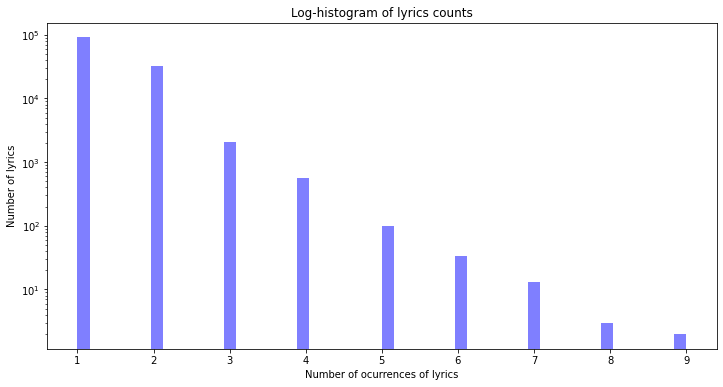

In [128]:
plt.figure(figsize=(12,6))
plt.hist(lyrics.value_counts(), bins=50, alpha=0.5, color="b", label="lyrics")
plt.title("Log-histogram of lyrics counts")
plt.yscale("log")
plt.xlabel("Number of ocurrences of lyrics")
plt.ylabel("Number of lyrics")

### 불필요한 곡 제거

In [151]:
DATA_IN_PATH = "./data"
FILE_NAME = "kor_songs"
DATA_PATH =os.path.join(DATA_IN_PATH, FILE_NAME)
songs = pd.read_csv(DATA_PATH, sep="\t")
songs.head()

,song_code,song_title,artist,album_cover,album_title,public_date,genre,lyrics
0,30413695,별 헤는 밤,홍서영,https://cdnimg.melon.co.kr/cm/album/images/100...,그녀는 거짓말을 너무 사랑해 OST,2017.05.15,국내드라마,가슴 속에서 하나 둘\n저 밤 하늘의 별들을\n수 없이 많이 묻어둔\n그 밤을 기억...
1,3745237,Let It Go,신화,https://cdnimg.melon.co.kr/cm/album/images/020...,The Return,2012.03.23,댄스,그리워 아직도\n나는 너를 버릴 수 없어\n미워도 매일 밤 보고 싶어\n널 꿈에서라...
2,1843736,아직 못다한 이야기,신화,https://cdnimg.melon.co.kr/cm/album/images/003...,신화 9집,2008.04.03,발라드,아무것도 없지만\n가슴이 늘 벅찼던\n처음 만났던 우리\n같은 꿈을 믿었기에 행복했...
3,536319,Oh!,신화,https://cdnimg.melon.co.kr/cm/album/images/000...,Brand New,2004.08.27,댄스,100percent satisfaction\nguaranteed no cash ba...
4,1843728,Voyage,신화,https://cdnimg.melon.co.kr/cm/album/images/003...,신화 9집,2008.04.03,발라드,Everything was so easy\nback then\n그렇게 우리 함께 있...


In [152]:
# 일어가 포함된 번역곡 제외
songs["song_title"].astype(str)
songs['lyrics'] = songs.loc[~songs['lyrics'].str.contains('[ぁ-ゔ]+|[ァ-ヴー]+[々〆〤]',  regex=True) & ~songs['song_title'].str.contains('[ぁ-ゔ]+|[ァ-ヴー]+[々〆〤]',  regex=True, na=False)]["lyrics"]

In [153]:
songs

,song_code,song_title,artist,album_cover,album_title,public_date,genre,lyrics
0,30413695,별 헤는 밤,홍서영,https://cdnimg.melon.co.kr/cm/album/images/100...,그녀는 거짓말을 너무 사랑해 OST,2017.05.15,국내드라마,가슴 속에서 하나 둘\n저 밤 하늘의 별들을\n수 없이 많이 묻어둔\n그 밤을 기억...
1,3745237,Let It Go,신화,https://cdnimg.melon.co.kr/cm/album/images/020...,The Return,2012.03.23,댄스,그리워 아직도\n나는 너를 버릴 수 없어\n미워도 매일 밤 보고 싶어\n널 꿈에서라...
2,1843736,아직 못다한 이야기,신화,https://cdnimg.melon.co.kr/cm/album/images/003...,신화 9집,2008.04.03,발라드,아무것도 없지만\n가슴이 늘 벅찼던\n처음 만났던 우리\n같은 꿈을 믿었기에 행복했...
3,536319,Oh!,신화,https://cdnimg.melon.co.kr/cm/album/images/000...,Brand New,2004.08.27,댄스,100percent satisfaction\nguaranteed no cash ba...
4,1843728,Voyage,신화,https://cdnimg.melon.co.kr/cm/album/images/003...,신화 9집,2008.04.03,발라드,Everything was so easy\nback then\n그렇게 우리 함께 있...
...,...,...,...,...,...,...,...,...
168057,4146771,夢の途中 / Yumeno Tochuu (꿈의 도중),Kokia,https://cdnimg.melon.co.kr/cm/album/images/021...,Where To Go My Love?,2013.06.19,J-POP,NaN
168058,3546601,本當の音 / Hontouno Oto (진실의 소리),Kokia,https://cdnimg.melon.co.kr/cm/album/images/020...,Moment,2011.05.18,J-POP,NaN
168059,3546600,大丈夫 だいじょうぶ / Daijyoubu Daijyoubu (괜찮아 괜찮아),Kokia,https://cdnimg.melon.co.kr/cm/album/images/020...,Moment,2011.05.18,J-POP,NaN
168060,3546606,もう一度 / Mou Ichido (한번 더),Kokia,https://cdnimg.melon.co.kr/cm/album/images/020...,Moment,2011.05.18,J-POP,NaN


In [154]:
# 장르 확인
songs['genre'].unique().tolist()

['국내드라마',
 '댄스',
 '발라드',
 '록/메탈',
 '포크/블루스',
 'R&B/Soul',
 '-',
 '인디음악',
 '랩/힙합',
 'CCM',
 '성인가요/트로트',
 '재즈',
 'POP',
 'J-POP',
 '일렉트로니카',
 '국내영화',
 '국내뮤지컬',
 '국악',
 '애니메이션/웹툰',
 '키즈',
 '국외드라마',
 '국외뮤지컬',
 '클래식',
 '뉴에이지',
 '게임',
 '포크',
 '컨트리',
 '월드뮤직',
 '국외영화',
 '블루스',
 '가톨릭',
 '불교',
 '뮤직테라피']

In [176]:
#['J-POP', '국악', '키즈', '가톨릭', '불교', 'CCM'] 장르 제외
del_tag_list = ['J-POP', '국악', '키즈', '가톨릭', '불교', 'CCM']
dataset_f = pd.DataFrame()

In [188]:
for idx, tag in enumerate(del_tag_list):
    if idx == 0:
        dataset_f = songs[~(songs['genre'] == tag)]
    else: 
        dataset_f = dataset_f[~(dataset_f['genre'] == tag)]

In [189]:
dataset_f

,song_code,song_title,artist,album_cover,album_title,public_date,genre,lyrics
0,30413695,별 헤는 밤,홍서영,https://cdnimg.melon.co.kr/cm/album/images/100...,그녀는 거짓말을 너무 사랑해 OST,2017.05.15,국내드라마,가슴 속에서 하나 둘\n저 밤 하늘의 별들을\n수 없이 많이 묻어둔\n그 밤을 기억...
1,3745237,Let It Go,신화,https://cdnimg.melon.co.kr/cm/album/images/020...,The Return,2012.03.23,댄스,그리워 아직도\n나는 너를 버릴 수 없어\n미워도 매일 밤 보고 싶어\n널 꿈에서라...
2,1843736,아직 못다한 이야기,신화,https://cdnimg.melon.co.kr/cm/album/images/003...,신화 9집,2008.04.03,발라드,아무것도 없지만\n가슴이 늘 벅찼던\n처음 만났던 우리\n같은 꿈을 믿었기에 행복했...
3,536319,Oh!,신화,https://cdnimg.melon.co.kr/cm/album/images/000...,Brand New,2004.08.27,댄스,100percent satisfaction\nguaranteed no cash ba...
4,1843728,Voyage,신화,https://cdnimg.melon.co.kr/cm/album/images/003...,신화 9집,2008.04.03,발라드,Everything was so easy\nback then\n그렇게 우리 함께 있...
...,...,...,...,...,...,...,...,...
168052,3152261,혼자 사랑한 만큼... (원하고 바라고 지우고),소울맨,https://cdnimg.melon.co.kr/cm/album/images/011...,Love Ballad Project Part.2,2011.02.22,발라드,원하고 또 원하고 원하면\n우리 이뤄질까요\n바라고 또 바라고 바라면\n우리 이뤄질...
168053,8109544,사랑하면 알게 되는 것들,커피소년,https://cdnimg.melon.co.kr/cm/album/images/026...,정규 4집 '꽃',2016.03.24,인디음악,하늘 아래 똑같은 핑크는 없다는 것\n마카롱은 쫀득하고 고급스런 단맛\n아이섀도우가...
168054,9648439,걱정남녀,클래지콰이,https://cdnimg.melon.co.kr/cm/album/images/027...,Travellers,2016.09.20,일렉트로니카,툭하면 아침 빈속 커피\n부지런하면 좋잖아\n웃으면서 대답은 해도\n지키지 못할 약...
168055,31764827,카메라를 챙겨,위아더나잇 (We Are The Night),https://cdnimg.melon.co.kr/cm/album/images/102...,"아, 이 어지러움",2019.04.28,인디음악,카메라를 챙겨 긴 밤\n이곳은 나의 꿈이야\n너에게로 가는 중야\n나는 너를 찍을 ...


In [190]:
# 같은 노래 코드 제외
dataset_f = dataset_f[~dataset_f['song_code'].duplicated()]

In [191]:
dataset_f.shape

(127658, 8)

In [192]:
# 동일 가수의 동일 곡 제외
dataset_f["title_artist"] = dataset_f["song_title"] + dataset_f['artist']
dataset_f = dataset_f.drop_duplicates(["title_artist"], keep='first')
dataset_f = dataset_f.drop_duplicates(["lyrics"], keep='first')

C:\Users\speci\AppData\Local\Temp\ipykernel_14300\1886895769.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_f["title_artist"] = dataset_f["song_title"] + dataset_f['artist']


In [193]:
dataset_f.shape

(114326, 9)

In [194]:
# 연도 클러스터링을 위한 파생변수 생성
dataset_f["public_date_DV"] = dataset_f["public_date"].astype(str).apply(lambda x: x[:4])
dataset_f["public_date_DV"] = dataset_f["public_date_DV"].replace('-', 0).astype(int).round(-1)

In [195]:
dataset_f.head(1)

,song_code,song_title,artist,album_cover,album_title,public_date,genre,lyrics,title_artist,public_date_DV
0,30413695,별 헤는 밤,홍서영,https://cdnimg.melon.co.kr/cm/album/images/100...,그녀는 거짓말을 너무 사랑해 OST,2017.05.15,국내드라마,가슴 속에서 하나 둘\n저 밤 하늘의 별들을\n수 없이 많이 묻어둔\n그 밤을 기억...,별 헤는 밤홍서영,2020


In [196]:
# MR 곡, 연주곡 제외
dataset_f = dataset_f[~dataset_ff["song_title"].astype(str).str.contains("MR") & ~dataset_f["song_title"].astype(str).str.contains("inst.")]
dataset_f = dataset_f.drop("title_artist", axis=1)
dataset_f.shape

(113239, 9)

In [198]:
dataset_f = dataset_f[~dataset_f["song_title"].astype(str).str.contains("Inst.")]
dataset_f.shape

(113239, 9)

### 가사유사도를 위한 데이터 만들기

In [199]:
dataset_ff = dataset_f.copy()

In [200]:
dataset_ff["lyrics"] = dataset_ff["lyrics"].astype(str).apply(lambda x: re.sub("\n", " ", x))

In [202]:
def only_kor_ff(lyrics):
    hangul = re.compile('[^ ㄱ-ㅣ가-힣]+')
    lyrics_kr = hangul.sub('', lyrics)
    result = ' '.join(lyrics_kr.split())
    return result

In [203]:
dataset_ff['lyrics'][1]

"그리워 아직도 나는 너를 버릴 수 없어 미워도 매일 밤 보고 싶어 널 꿈에서라도 oh who 희망 조차 안보이고 존재감도 점점 사라지고 마치 저주 받은 운명인 듯해 절망에 빠진 것도 지긋지긋해 달라질 거라고 기다릴 거라고 이번이 딱 마지막 일거라고 그런 말 듣기 지겹다고 I guess I gotta let it all go 이젠 하루하루 내 기억들을 다 지울 수 있다고 날 떠나버린 이유 사랑했던 이유 다 잊을 수 있다고 let it go let it go let it go baby let it go I just can't go on I just can't go on just let it go baby 아무런 의미 없어 너와나 소중했던 기억 사랑했던 날도 oh ye yo yo yo 숨막혀 매일 밤 눌리는 가위 시간이 지날수록 바위처럼 무거워져 몸과 맘이 커져가는 그대의 빈자리 So lonely my one and only 눈에 멀어져야만 내 맘에 문을 닫지만 계속 열리고 I can't let it go 이젠 하루하루 내 기억들을 다 지울 수 있다고 날 떠나버린 이유 사랑했던 이유 다 잊을 수 있다고 let it go let it go let it go baby let it go I just can't go on I just can't go on 너무 힘들어 Need an ambulance 누가 날 일으켜줘 Can't handle it 복잡해 몸과 마음이 손을 내밀어 봤자 잡아주지 않아 Where you at 너무 힘들어 Need an ambulance 누가 날 일으켜줘 Can't handle it 복잡해 몸과 마음이 손을 내밀어 봤자 잡아주지 않아 Where you at 복잡해 몸과 마음이 손을 내밀어 봤자 잡아주지 않아 Where you at 이젠 떠나줄게 널 보내줄게 내 기억에 모든 널 견딜 수 없어도 버틸 수 없어도 눈물이 흘러도 let it go let it go let it go baby let it go I just can't go on I just

In [204]:
dataset_ff['lyrics'] = dataset_ff['lyrics'].apply(only_kor_sp)

In [205]:
dataset_ff['lyrics'][1]

'그리워 아직도 나는 너를 버릴 수 없어 미워도 매일 밤 보고 싶어 널 꿈에서라도 희망 조차 안보이고 존재감도 점점 사라지고 마치 저주 받은 운명인 듯해 절망에 빠진 것도 지긋지긋해 달라질 거라고 기다릴 거라고 이번이 딱 마지막 일거라고 그런 말 듣기 지겹다고 이젠 하루하루 내 기억들을 다 지울 수 있다고 날 떠나버린 이유 사랑했던 이유 다 잊을 수 있다고 아무런 의미 없어 너와나 소중했던 기억 사랑했던 날도 숨막혀 매일 밤 눌리는 가위 시간이 지날수록 바위처럼 무거워져 몸과 맘이 커져가는 그대의 빈자리 눈에 멀어져야만 내 맘에 문을 닫지만 계속 열리고 이젠 하루하루 내 기억들을 다 지울 수 있다고 날 떠나버린 이유 사랑했던 이유 다 잊을 수 있다고 너무 힘들어 누가 날 일으켜줘 복잡해 몸과 마음이 손을 내밀어 봤자 잡아주지 않아 너무 힘들어 누가 날 일으켜줘 복잡해 몸과 마음이 손을 내밀어 봤자 잡아주지 않아 복잡해 몸과 마음이 손을 내밀어 봤자 잡아주지 않아 이젠 떠나줄게 널 보내줄게 내 기억에 모든 널 견딜 수 없어도 버틸 수 없어도 눈물이 흘러도'

In [107]:
dataset_ff

,song_code,song_title,artist,album_cover,album_title,public_date,genre,lyrics,public_date_DV
0,30413695,별 헤는 밤,홍서영,https://cdnimg.melon.co.kr/cm/album/images/100...,그녀는 거짓말을 너무 사랑해 OST,2017.05.15,국내드라마,가슴 속에서 하나 둘 저 밤 하늘의 별들을 수 없이 많이 묻어둔 그 밤을 기억하죠 ...,2020
1,3745237,Let It Go,신화,https://cdnimg.melon.co.kr/cm/album/images/020...,The Return,2012.03.23,댄스,그리워 아직도 나는 너를 버릴 수 없어 미워도 매일 밤 보고 싶어 널 꿈에서라도 희...,2010
2,1843736,아직 못다한 이야기,신화,https://cdnimg.melon.co.kr/cm/album/images/003...,신화 9집,2008.04.03,발라드,아무것도 없지만 가슴이 늘 벅찼던 처음 만났던 우리 같은 꿈을 믿었기에 행복했지 아...,2010
3,536319,Oh!,신화,https://cdnimg.melon.co.kr/cm/album/images/000...,Brand New,2004.08.27,댄스,거리 위에 시선들 내 음악에 미친 듯 하나 둘 취해 가는데 화려한 너의 몸짓도 나를...,2000
4,1843728,Voyage,신화,https://cdnimg.melon.co.kr/cm/album/images/003...,신화 9집,2008.04.03,발라드,그렇게 우리 함께 있다는게 그땐 모든 게 쉬웠었지 서로를 가질 수 있다는게 그때는 ...,2010
...,...,...,...,...,...,...,...,...,...
168050,4155896,혼자하는 사랑,멜로디데이 (MelodyDay),https://cdnimg.melon.co.kr/cm/album/images/021...,New Wave Studio Rookie (Vol.1),2013.06.26,발라드,혼자 하는 사랑인 것 같아 이렇게도 가슴이 아파와 조심스레 시작된 서툴렀던 그맘이 ...,2010
168052,3152261,혼자 사랑한 만큼... (원하고 바라고 지우고),소울맨,https://cdnimg.melon.co.kr/cm/album/images/011...,Love Ballad Project Part.2,2011.02.22,발라드,원하고 또 원하고 원하면 우리 이뤄질까요 바라고 또 바라고 바라면 우리 이뤄질까요 ...,2010
168053,8109544,사랑하면 알게 되는 것들,커피소년,https://cdnimg.melon.co.kr/cm/album/images/026...,정규 4집 '꽃',2016.03.24,인디음악,하늘 아래 똑같은 핑크는 없다는 것 마카롱은 쫀득하고 고급스런 단맛 아이섀도우가 깨...,2020
168054,9648439,걱정남녀,클래지콰이,https://cdnimg.melon.co.kr/cm/album/images/027...,Travellers,2016.09.20,일렉트로니카,툭하면 아침 빈속 커피 부지런하면 좋잖아 웃으면서 대답은 해도 지키지 못할 약속 툭...,2020


In [ ]:
dataset_ff.to_csv(f'data/kor_songs_11.tsv', sep="\t", index=False)

### 감정분류를 위한 데이터 만들기

In [218]:
dataset_fnl = dataset_f.copy()

In [230]:
dataset_fnl["lyrics"] = dataset_fnl["lyrics"].astype(str)

In [231]:
def only_kor_line(lyrics):
    hangul = re.compile('[^ 가-힣|^\\n]')
    lyrics_kr = hangul.sub('', lyrics)
    space = re.compile('[  ]+')
    lyrics_kr_re = space.sub(' ', lyrics_kr)
    space_re = re.compile('[ \n][ \n \n]+')
    result = space_re.sub('\n', lyrics_kr_re)
    return result

In [232]:
dataset_fnl['lyrics'][1]

"그리워 아직도\n나는 너를 버릴 수 없어\n미워도 매일 밤 보고 싶어\n널 꿈에서라도 oh who\n희망 조차 안보이고\n존재감도 점점 사라지고\n마치 저주 받은 운명인 듯해\n절망에 빠진 것도 지긋지긋해\n달라질 거라고 기다릴 거라고\n이번이 딱 마지막 일거라고\n그런 말 듣기 지겹다고\nI guess I gotta let it all go\n이젠 하루하루\n내 기억들을 다 지울 수 있다고\n날 떠나버린 이유 사랑했던 이유\n다 잊을 수 있다고\nlet it go let it go let it go\nbaby let it go\nI just can't go on\nI just can't go on\njust let it go baby\n아무런 의미 없어\n너와나 소중했던 기억\n사랑했던 날도 oh ye\nyo yo yo 숨막혀\n매일 밤 눌리는 가위\n시간이 지날수록 바위처럼 무거워져\n몸과 맘이 커져가는 그대의 빈자리\nSo lonely my one and only\n눈에 멀어져야만\n내 맘에 문을 닫지만\n계속 열리고 I can't let it go\n이젠 하루하루\n내 기억들을 다 지울 수 있다고\n날 떠나버린 이유 사랑했던 이유\n다 잊을 수 있다고\nlet it go let it go let it go\nbaby let it go\nI just can't go on\nI just can't go on\n너무 힘들어 Need an ambulance\n누가 날 일으켜줘 Can't handle it\n복잡해 몸과 마음이\n손을 내밀어 봤자\n잡아주지 않아 Where you at\n너무 힘들어 Need an ambulance\n누가 날 일으켜줘 Can't handle it\n복잡해 몸과 마음이\n손을 내밀어 봤자\n잡아주지 않아 Where you at\n복잡해 몸과 마음이\n손을 내밀어 봤자\n잡아주지 않아 Where you at\n이젠 떠나줄게 널 보내줄게\n내 기억에 모든 널\n견딜 수 없어도\n버틸 수 없어도 눈물이 흘러도\nlet it go let

In [233]:
dataset_fnl['lyrics'] = dataset_fnl['lyrics'].apply(only_kor_line)

In [234]:
dataset_fnl['lyrics'][1]

'그리워 아직도\n나는 너를 버릴 수 없어\n미워도 매일 밤 보고 싶어\n널 꿈에서라도\n희망 조차 안보이고\n존재감도 점점 사라지고\n마치 저주 받은 운명인 듯해\n절망에 빠진 것도 지긋지긋해\n달라질 거라고 기다릴 거라고\n이번이 딱 마지막 일거라고\n그런 말 듣기 지겹다고\n이젠 하루하루\n내 기억들을 다 지울 수 있다고\n날 떠나버린 이유 사랑했던 이유\n다 잊을 수 있다고\n아무런 의미 없어\n너와나 소중했던 기억\n사랑했던 날도\n숨막혀\n매일 밤 눌리는 가위\n시간이 지날수록 바위처럼 무거워져\n몸과 맘이 커져가는 그대의 빈자리\n눈에 멀어져야만\n내 맘에 문을 닫지만\n계속 열리고\n이젠 하루하루\n내 기억들을 다 지울 수 있다고\n날 떠나버린 이유 사랑했던 이유\n다 잊을 수 있다고\n너무 힘들어\n누가 날 일으켜줘\n복잡해 몸과 마음이\n손을 내밀어 봤자\n잡아주지 않아\n너무 힘들어\n누가 날 일으켜줘\n복잡해 몸과 마음이\n손을 내밀어 봤자\n잡아주지 않아\n복잡해 몸과 마음이\n손을 내밀어 봤자\n잡아주지 않아\n이젠 떠나줄게 널 보내줄게\n내 기억에 모든 널\n견딜 수 없어도\n버틸 수 없어도 눈물이 흘러도\n'

In [ ]:
dataset_fnl.to_csv(f'data/kor_songs_11_nl.tsv', sep="\t", index=False)

In [ ]:
pd.read_csv(f'data/kor_songs_11_nl.tsv', sep="\t")

### 감정분류 Valiadation data 만들기
* ['행복한', '화나는', '평온한', '슬픈'] 4가지 분류

In [410]:
df = songs.set_index('song_code')

In [411]:
validation_df = pd.DataFrame()

In [459]:
validation_df = df.loc[[34997078, 34754292, 34657844, 35008524, 35008527, 4276080, 7877917, 4660909, 31388211, 32381415, 
        4175025, 8141272, 33480898, 32870322, 32183384, 32224088, 30985406, 30648770, 34388139, 7870707,
        30789565, 3743328, 34153819, 31453944, 34471452, 33082577, 32061975, 8077036, 4622988,
        33655994, 5781104, 31923337, 8247388, 32559782, 31448491, 32188182, 33970408, 31164146, 31181453, 
        35335547, 4232200, 4226211, 4226210, 4232210, 2626711, 4543502, 3743329, 5474213, 30017602, 
        30178900, 4246962, 4616187, 7868638, 2584594, 3791334, 30099927, 5760115, 30343198, 30293567, 
        8269733, 2512751, 4062755, 4124164, 2795052, 4864206, 32251432, 5650996, 3853980, 2312253, 
        4681146, 2314377, 2951700, 5442687, 5826447, 4643467, 3906383, 7854179, 4011596, 30880683,
        4328771, 4237755, 5731941, 3665143, 5421427, 5653497, 5531227, 3534941, 4824733, 4328770, 
        2733251, 1951556, 2212365, 5748406, 4193337, 3715672, 2258761, 4806688, 3414749, 4369827, 
        3403767, 7921208, 7896511, 4665108, 5386171, 2654264, 2705410, 3782257, 
        2549049, 31159910, 32662564]]

In [460]:
len(validation_df)

112

In [461]:
emo_list = ['행복한', '화나는', '행복한', '슬픈', '슬픈', '슬픈', '슬픈', '행복한', '평온한', '평온한', 
            '평온한', '행복한', '평온한', '평온한', '평온한', '슬픈', '슬픈', '평온한', '슬픈', '슬픈',
            '평온한', '평온한', '슬픈', '평온한', '슬픈', '슬픈', '슬픈', '평온한', '행복한', '행복한',
            '평온한', '평온한', '행복한', '행복한', '행복한', '화나는', '행복한', '행복한', '행복한', '평온한', 
            '평온한', '화나는', '화나는', '화나는', '화나는', '화나는', '슬픈', '슬픈', '평온한', '평온한', 
            '슬픈', '슬픈', '평온한', '행복한', '행복한', '행복한', '슬픈', '슬픈', '평온한', '행복한', 
            '슬픈', '행복한', '평온한', '평온한', '슬픈', '슬픈', '슬픈', '행복한', '슬픈', '슬픈', 
            '평온한', '화나는', '화나는', '화나는', '화나는', '화나는', '슬픈', '행복한', '슬픈', 
            '슬픈', '화나는', '슬픈', '슬픈', '화나는', '평온한', '화나는', '화나는', '화나는', '슬픈', 
            '화나는', '슬픈', '화나는', '행복한', '화나는', '슬픈', '화나는', '화나는', '행복한', '행복한', 
            '슬픈', '평온한', '평온한', '슬픈', '슬픈', '행복한', '화나는', '행복한', 
            '행복한', '화나는', '화나는']

In [462]:
len(emo_list)

110

In [463]:
validation_df = validation_df.drop_duplicates(["lyrics"], keep='first')

In [465]:
validation_df['lyrics'] = validation_df['lyrics'].apply(only_kor_line)

In [466]:
validation_df['lyrics']

song_code
34997078    \n이리 오너라\n오래간만이지\n우리 다시 웃고 울고 지지고 볶고\n그래 기분이 오...
34754292     넌 못 감당해 날\n기분은\n나의 이름\n네가 싫다 해도 좋아\n뭘 그리 찡그려 ...
34657844    너와 함께 하고 싶은 일들을\n상상하는 게\n요즘 내 일상이 되고\n너의 즐거워하는...
35008524    너를 위해 해 줄 것이 하나 없어서\n보낼 수밖에 없었고\n네가 없이 사는 법을 알...
35008527    하얀 머리 뽑아 달라며\n한 개 백 원이라던\n그 시절 다 지나가고\n이젠 흰 눈만...
                                  ...                        
2705410     늦게 다니지좀 마\n술은 멀리좀 해봐\n열살짜리 애처럼 말을 안듣니\n정말 웃음만 ...
3782257     둥근 해가 뜨면 제일 먼저\n기분 좋은 상상을 하지\n하나 둘 셋 자리에 일어나\n...
2549049     사랑노래가 너무 많아서\n어떤 노래로 고백을 할까\n처음본 순간\n미칠 것 같은데\...
31159910    잔인한 곳 무자비한 곳\n목구멍 풀칠해\n버텨내 살아내는 것도 벅차\n세상은 잔인한...
32662564    얼마전 버벌진트가\n내게 피처링을 부탁했어\n나는 흔쾌히 응했지\n하지만 곧 나는 ...
Name: lyrics, Length: 110, dtype: object

In [467]:
validation_df['emotion'] = emo_list

In [468]:
validation_df['emotion'].value_counts()

슬픈     35
행복한    25
화나는    25
평온한    25
Name: emotion, dtype: int64

In [469]:
validation_df.to_csv(f'data/kor_songs_validation_nl.tsv', sep="\t", index=True)

In [470]:
pd.read_csv(f'data/kor_songs_validation_nl.tsv', sep="\t")

,song_code,song_title,artist,album_cover,album_title,public_date,genre,lyrics,emotion
0,34997078,That That (prod. & feat. SUGA of BTS),싸이 (PSY),https://cdnimg.melon.co.kr/cm2/album/images/10...,싸다9,2022.04.29,댄스,\n이리 오너라\n오래간만이지\n우리 다시 웃고 울고 지지고 볶고\n그래 기분이 오...,행복한
1,34754292,TOMBOY,(여자)아이들,https://cdnimg.melon.co.kr/cm2/album/images/10...,I NEVER DIE,2022.03.14,록/메탈,넌 못 감당해 날\n기분은\n나의 이름\n네가 싫다 해도 좋아\n뭘 그리 찡그려 ...,화나는
2,34657844,사랑인가 봐,멜로망스,https://cdnimg.melon.co.kr/cm2/album/images/10...,사랑인가 봐 (사내맞선 OST 스페셜 트랙),2022.02.18,발라드,너와 함께 하고 싶은 일들을\n상상하는 게\n요즘 내 일상이 되고\n너의 즐거워하는...,행복한
3,35008524,다시 만날 수 있을까,임영웅,https://cdnimg.melon.co.kr/cm2/album/images/10...,IM HERO,2022.05.02,발라드,너를 위해 해 줄 것이 하나 없어서\n보낼 수밖에 없었고\n네가 없이 사는 법을 알...,슬픈
4,35008527,아버지,임영웅,https://cdnimg.melon.co.kr/cm2/album/images/10...,IM HERO,2022.05.02,발라드,하얀 머리 뽑아 달라며\n한 개 백 원이라던\n그 시절 다 지나가고\n이젠 흰 눈만...,슬픈
...,...,...,...,...,...,...,...,...,...
105,2705410,잔소리 (With 2AM 슬옹),아이유,https://cdnimg.melon.co.kr/cm/album/images/009...,잔소리,2010.06.03,발라드,늦게 다니지좀 마\n술은 멀리좀 해봐\n열살짜리 애처럼 말을 안듣니\n정말 웃음만 ...,화나는
106,3782257,Happy Things,제이레빗(J Rabbit),https://cdnimg.melon.co.kr/cm/album/images/021...,Looking Around,2012.04.25,발라드,둥근 해가 뜨면 제일 먼저\n기분 좋은 상상을 하지\n하나 둘 셋 자리에 일어나\n...,행복한
107,2549049,좋다,데이브레이크 (DAYBREAK),https://cdnimg.melon.co.kr/cm/album/images/007...,New Day,2010.01.19,인디음악,사랑노래가 너무 많아서\n어떤 노래로 고백을 할까\n처음본 순간\n미칠 것 같은데\...,행복한
108,31159910,세상은 잔인한 곳 (It's a cruel world),정성화,https://cdnimg.melon.co.kr/cm/album/images/101...,뮤지컬 웃는남자 OST,2018.07.02,국내뮤지컬,잔인한 곳 무자비한 곳\n목구멍 풀칠해\n버텨내 살아내는 것도 벅차\n세상은 잔인한...,화나는
